# Independent Project 2
Undergraduate students and Graduate students:

Use the following tutorial to create your own KNN application.

https://machinelearningmastery.com/tutorial-to-implement-k-nearest-neighbors-in-python-from-scratch/#:~:text=The%20k%2DNearest%20Neighbors%20algorithm%20or%20KNN%20for%20short%20is,a%20summarized%20prediction%20is%20made

Create a problem statement
- Retrieve a dataset or create one
- Implement algorithm
- Use the dataset to make predictions
- If possible, create a GUI
- Name the application

Required deliverables:
- Link to the dataset (you do not necessarily have to upload the dataset itself)
- Source code
- Output
- Screenshots
- 1-3 Paragraph Explanation

Research Sources:
- DATASET: https://www.kaggle.com/code/amolbhivarkar/knn-for-classification-using-scikit-learn/data

Explanation:

This application take into account a person's medical history (specifically at preivous pregnancies, glucose levels, blood pressure, skin thickness, insulin levels, BMI (Body Mass Index),	diabetes pedigree function, and	age) and if they have diabeties (1 for True, 0 for False). By doing a train/test split in this data, I applied the KNN classifier to the dataset to see if this model can accurately predict if a person has diabeties or not. This model resulted in ~74% accuracy at the highest with 14 k-neighbors. 

I was curious if other clissifications would result in a higher accuracy, so I also applied serveral others to compare. The highest accuracy I got as ~79% with the Logistic Regression classifier. 


#Application Name: Diabeties Predictor

In [ ]:
#Making a KNN application to predict if a patient has diabeties

import pandas as pd
from pandas import read_csv

import numpy as np
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

#For Google Sheets
from google.colab import auth
auth.authenticate_user()

import gspread
from google.auth import default
creds, _ = default()

gc = gspread.authorize(creds)

In [ ]:
#Import directly from Google Sheets
worksheet = gc.open('diabetes').sheet1

# get_all_values gives a list of rows
rows = worksheet.get_all_values()
print(rows)

# Convert to a DataFrame and render
data = pd.DataFrame.from_records(rows)
data

[['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'], ['6', '148', '72', '35', '0', '33.6', '0.627', '50', '1'], ['1', '85', '66', '29', '0', '26.6', '0.351', '31', '0'], ['8', '183', '64', '0', '0', '23.3', '0.672', '32', '1'], ['1', '89', '66', '23', '94', '28.1', '0.167', '21', '0'], ['0', '137', '40', '35', '168', '43.1', '2.288', '33', '1'], ['5', '116', '74', '0', '0', '25.6', '0.201', '30', '0'], ['3', '78', '50', '32', '88', '31', '0.248', '26', '1'], ['10', '115', '0', '0', '0', '35.3', '0.134', '29', '0'], ['2', '197', '70', '45', '543', '30.5', '0.158', '53', '1'], ['8', '125', '96', '0', '0', '0', '0.232', '54', '1'], ['4', '110', '92', '0', '0', '37.6', '0.191', '30', '0'], ['10', '168', '74', '0', '0', '38', '0.537', '34', '1'], ['10', '139', '80', '0', '0', '27.1', '1.441', '57', '0'], ['1', '189', '60', '23', '846', '30.1', '0.398', '59', '1'], ['5', '166', '72', '19', '175', '25.8', '0.587', '51',

,0,1,2,3,4,5,6,7,8
0,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
1,6,148,72,35,0,33.6,0.627,50,1
2,1,85,66,29,0,26.6,0.351,31,0
3,8,183,64,0,0,23.3,0.672,32,1
4,1,89,66,23,94,28.1,0.167,21,0
...,...,...,...,...,...,...,...,...,...
764,10,101,76,48,180,32.9,0.171,63,0
765,2,122,70,27,0,36.8,0.34,27,0
766,5,121,72,23,112,26.2,0.245,30,0
767,1,126,60,0,0,30.1,0.349,47,1


In [ ]:
#Drop first row (headers) - this is for Google Colab
data = data.drop([0], axis=0)

In [ ]:
data

,0,1,2,3,4,5,6,7,8
1,6,148,72,35,0,33.6,0.627,50,1
2,1,85,66,29,0,26.6,0.351,31,0
3,8,183,64,0,0,23.3,0.672,32,1
4,1,89,66,23,94,28.1,0.167,21,0
5,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
764,10,101,76,48,180,32.9,0.171,63,0
765,2,122,70,27,0,36.8,0.34,27,0
766,5,121,72,23,112,26.2,0.245,30,0
767,1,126,60,0,0,30.1,0.349,47,1


In [ ]:
#We want to drop outcome column and use it as "labels"
#Rest of data to be used
x = data.drop([8],axis=1)
#Labels
y = data[8]

In [ ]:
x = x.astype(object).astype(float)
y = y.astype(object).astype(float)

In [ ]:
x

,0,1,2,3,4,5,6,7
1,6.0,148.0,72.0,35.0,0.0,33.6,0.627,50.0
2,1.0,85.0,66.0,29.0,0.0,26.6,0.351,31.0
3,8.0,183.0,64.0,0.0,0.0,23.3,0.672,32.0
4,1.0,89.0,66.0,23.0,94.0,28.1,0.167,21.0
5,0.0,137.0,40.0,35.0,168.0,43.1,2.288,33.0
...,...,...,...,...,...,...,...,...
764,10.0,101.0,76.0,48.0,180.0,32.9,0.171,63.0
765,2.0,122.0,70.0,27.0,0.0,36.8,0.340,27.0
766,5.0,121.0,72.0,23.0,112.0,26.2,0.245,30.0
767,1.0,126.0,60.0,0.0,0.0,30.1,0.349,47.0


In [ ]:
y

1      1.0
2      0.0
3      1.0
4      0.0
5      1.0
      ... 
764    0.0
765    0.0
766    0.0
767    1.0
768    0.0
Name: 8, Length: 768, dtype: float64

In [ ]:
#Now do the test/train split for training
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.20,stratify=y,random_state=1) #80% for training, 20% for testing

print(x_train)
print(x_test)
print(y_train)
print(y_test)

print(len(x_train))
print(len(x_test))
print(len(y_train))
print(len(y_test))

        0      1     2     3      4     5      6     7
679   3.0  121.0  52.0   0.0    0.0  36.0  0.127  25.0
54    8.0  176.0  90.0  34.0  300.0  33.7  0.467  58.0
666   1.0  112.0  80.0  45.0  132.0  34.8  0.217  24.0
220   5.0  112.0  66.0   0.0    0.0  37.8  0.261  41.0
721   4.0   83.0  86.0  19.0    0.0  29.3  0.317  34.0
..    ...    ...   ...   ...    ...   ...    ...   ...
89   15.0  136.0  70.0  32.0  110.0  37.1  0.153  43.0
138   0.0   93.0  60.0  25.0   92.0  28.7  0.532  22.0
646   2.0  157.0  74.0  35.0  440.0  39.4  0.134  30.0
309   0.0  128.0  68.0  19.0  180.0  30.5  1.391  25.0
333   1.0  180.0   0.0   0.0    0.0  43.3  0.282  41.0

[614 rows x 8 columns]
       0      1     2     3      4     5      6     7
489  4.0   99.0  72.0  17.0    0.0  25.6  0.294  28.0
414  1.0  143.0  74.0  22.0   61.0  26.2  0.256  21.0
113  1.0   89.0  76.0  34.0   37.0  31.2  0.192  23.0
223  7.0  119.0   0.0   0.0    0.0  25.2  0.209  37.0
712  5.0  126.0  78.0  27.0   22.0  29.6  0.43

In [ ]:
knn = KNeighborsClassifier(n_neighbors = 3)
knn.fit(x_train, y_train)
predict = knn.predict(x_test)

#Classification report for kNN
print(classification_report(y_test, predict))

              precision    recall  f1-score   support

         0.0       0.74      0.75      0.75       100
         1.0       0.53      0.52      0.52        54

    accuracy                           0.67       154
   macro avg       0.64      0.63      0.63       154
weighted avg       0.67      0.67      0.67       154



In [ ]:
knn = KNeighborsClassifier(n_neighbors = 5)
knn.fit(x_train, y_train)
predict = knn.predict(x_test)

#Classification report for kNN
print(classification_report(y_test, predict))

              precision    recall  f1-score   support

         0.0       0.75      0.81      0.78       100
         1.0       0.59      0.50      0.54        54

    accuracy                           0.70       154
   macro avg       0.67      0.66      0.66       154
weighted avg       0.69      0.70      0.70       154



In [ ]:
knn = KNeighborsClassifier(n_neighbors = 7)
knn.fit(x_train, y_train)
predict = knn.predict(x_test)

#Classification report for kNN
print(classification_report(y_test, predict))

              precision    recall  f1-score   support

         0.0       0.75      0.85      0.80       100
         1.0       0.63      0.48      0.55        54

    accuracy                           0.72       154
   macro avg       0.69      0.67      0.67       154
weighted avg       0.71      0.72      0.71       154



In [ ]:
knn = KNeighborsClassifier(n_neighbors = 9)
knn.fit(x_train, y_train)
predict = knn.predict(x_test)

#Classification report for kNN
print(classification_report(y_test, predict))

              precision    recall  f1-score   support

         0.0       0.77      0.86      0.81       100
         1.0       0.67      0.52      0.58        54

    accuracy                           0.74       154
   macro avg       0.72      0.69      0.70       154
weighted avg       0.73      0.74      0.73       154



In [ ]:
knn = KNeighborsClassifier(n_neighbors = 12)
knn.fit(x_train, y_train)
predict = knn.predict(x_test)

#Classification report for kNN
print(classification_report(y_test, predict))

              precision    recall  f1-score   support

         0.0       0.74      0.89      0.81       100
         1.0       0.67      0.41      0.51        54

    accuracy                           0.72       154
   macro avg       0.70      0.65      0.66       154
weighted avg       0.71      0.72      0.70       154



In [ ]:
knn = KNeighborsClassifier(n_neighbors = 200)
knn.fit(x_train, y_train)
predict = knn.predict(x_test)

#Classification report for kNN
print(classification_report(y_test, predict))

              precision    recall  f1-score   support

         0.0       0.65      1.00      0.79       100
         1.0       0.00      0.00      0.00        54

    accuracy                           0.65       154
   macro avg       0.32      0.50      0.39       154
weighted avg       0.42      0.65      0.51       154



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


[0.66233766 0.64935065 0.66233766 0.62337662 0.64935065 0.64935065
 0.64935065 0.64935065 0.65789474 0.67105263]
The optimal # of K neighbors: 12 


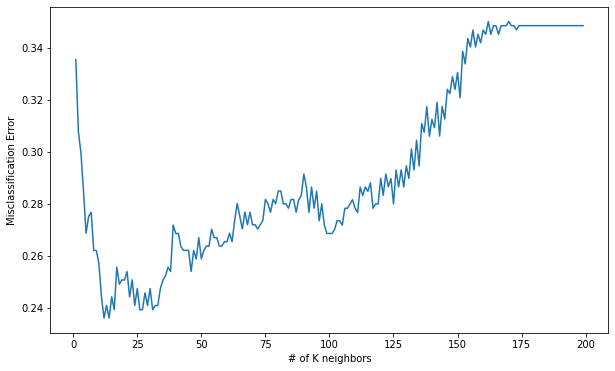

In [ ]:
#Plotting Error
from sklearn.model_selection import cross_val_score
neighbors = []
cv_scores = []

for k in range(1, 200):
    neighbors.append(k)
    knn = KNeighborsClassifier(n_neighbors = k)
    scores = cross_val_score(knn, x_train, y_train, cv = 10, scoring='accuracy')
    cv_scores.append(scores.mean())

scores = cross_val_score(knn, x, y, cv = 10, scoring='accuracy')
print(scores)

MSE = [1-x for x in cv_scores]
optimal_k = neighbors[MSE.index(min(MSE))]
print('The optimal # of K neighbors: %d ' %optimal_k)

plt.figure(figsize = (10,6))
plt.plot(neighbors, MSE)
plt.xlabel('# of K neighbors')
plt.ylabel('Misclassification Error')
plt.show()

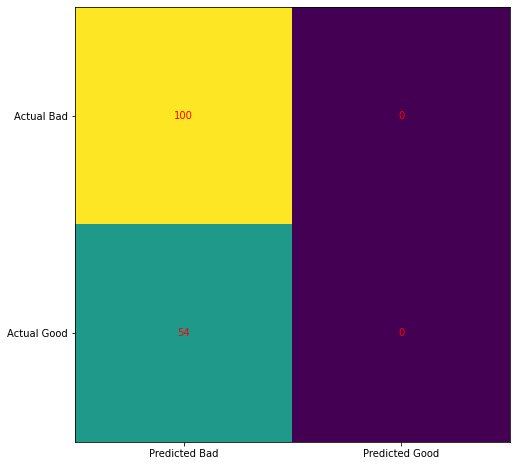

In [ ]:
#Graphical representation of the confusion matrix 
cm = confusion_matrix(y_test.values.ravel(), predict) 
 
fig, ax = plt.subplots(figsize=(8, 8)) 
ax.imshow(cm) 
ax.grid(False) 
ax.xaxis.set(ticks=(0, 1), ticklabels=('Predicted Bad', 'Predicted Good')) 
ax.yaxis.set(ticks=(0, 1), ticklabels=('Actual Bad', 'Actual Good')) 
ax.set_ylim(1.5, -0.5) 
for i in range(2):
    for j in range(2):
        ax.text(j, i, cm[i, j], ha='center', va='center', color='red') 
plt.show()

In [ ]:
#Hyper parameter tuning: this library helps find the best K value for the highest score.
#https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html
from sklearn.model_selection import GridSearchCV

param_grid = {'n_neighbors':np.arange(1,100)}
knn = KNeighborsClassifier()
knn_cv= GridSearchCV(knn,param_grid,cv=5)
knn_cv.fit(x,y)

GridSearchCV(cv=5, estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34,
       35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51,
       52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68,
       69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85,
       86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99])})

In [ ]:
knn_cv.best_score_

0.7578558696205755

In [ ]:
knn_cv.best_params_

{'n_neighbors': 14}

In [ ]:
knn = KNeighborsClassifier(n_neighbors = 14)
knn.fit(x_train, y_train)
predict = knn.predict(x_test)

#Classification report for kNN
print(classification_report(y_test, predict))

              precision    recall  f1-score   support

         0.0       0.74      0.92      0.82       100
         1.0       0.73      0.41      0.52        54

    accuracy                           0.74       154
   macro avg       0.74      0.66      0.67       154
weighted avg       0.74      0.74      0.72       154



#Other Clissifiers

In [ ]:
#Decision tree
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree

dt = DecisionTreeClassifier()
dt.fit(x_train,y_train)

DecisionTreeClassifier()

In [ ]:
model = DecisionTreeClassifier().fit(x_train,y_train)
text_representation = tree.export_text(dt)
print(text_representation)

|--- feature_1 <= 127.50
|   |--- feature_7 <= 28.50
|   |   |--- feature_5 <= 45.40
|   |   |   |--- feature_0 <= 7.50
|   |   |   |   |--- feature_5 <= 31.30
|   |   |   |   |   |--- feature_6 <= 0.67
|   |   |   |   |   |   |--- class: 0.0
|   |   |   |   |   |--- feature_6 >  0.67
|   |   |   |   |   |   |--- feature_6 <= 0.69
|   |   |   |   |   |   |   |--- class: 1.0
|   |   |   |   |   |   |--- feature_6 >  0.69
|   |   |   |   |   |   |   |--- class: 0.0
|   |   |   |   |--- feature_5 >  31.30
|   |   |   |   |   |--- feature_6 <= 0.90
|   |   |   |   |   |   |--- feature_2 <= 22.00
|   |   |   |   |   |   |   |--- class: 1.0
|   |   |   |   |   |   |--- feature_2 >  22.00
|   |   |   |   |   |   |   |--- feature_4 <= 38.00
|   |   |   |   |   |   |   |   |--- feature_3 <= 39.00
|   |   |   |   |   |   |   |   |   |--- feature_4 <= 34.00
|   |   |   |   |   |   |   |   |   |   |--- feature_1 <= 109.50
|   |   |   |   |   |   |   |   |   |   |   |--- class: 0.0
|   |   |   |   

In [ ]:
!pip install dtreeviz

In [ ]:
#https://mljar.com/blog/visualize-decision-tree/
from dtreeviz.trees import dtreeviz 

feature_names = ["Pregnancies", "Glucose", "BloodPressure", "SkinThickness", "Insulin", "BMI", "DiabetesPedigreeFunction", "Age"]

viz = dtreeviz(dt, x, y, target_name="target", feature_names=feature_names)
viz

findfont: Font family ['Arial'] not found. Falling back to DejaVu Sans.
/usr/local/lib/python3.7/dist-packages/numpy/core/fromnumeric.py:3208: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return asarray(a).size
/usr/local/lib/python3.7/dist-packages/matplotlib/cbook/__init__.py:1376: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.atleast_1d(X.T if isinstance(X, np.ndarray) else np.asarray(X))
findfont: Font family ['Arial'] not found. Falling back to DejaVu Sans.
findfont: Font family ['Arial'] not found. Falling back to DejaVu Sans.
findfont:

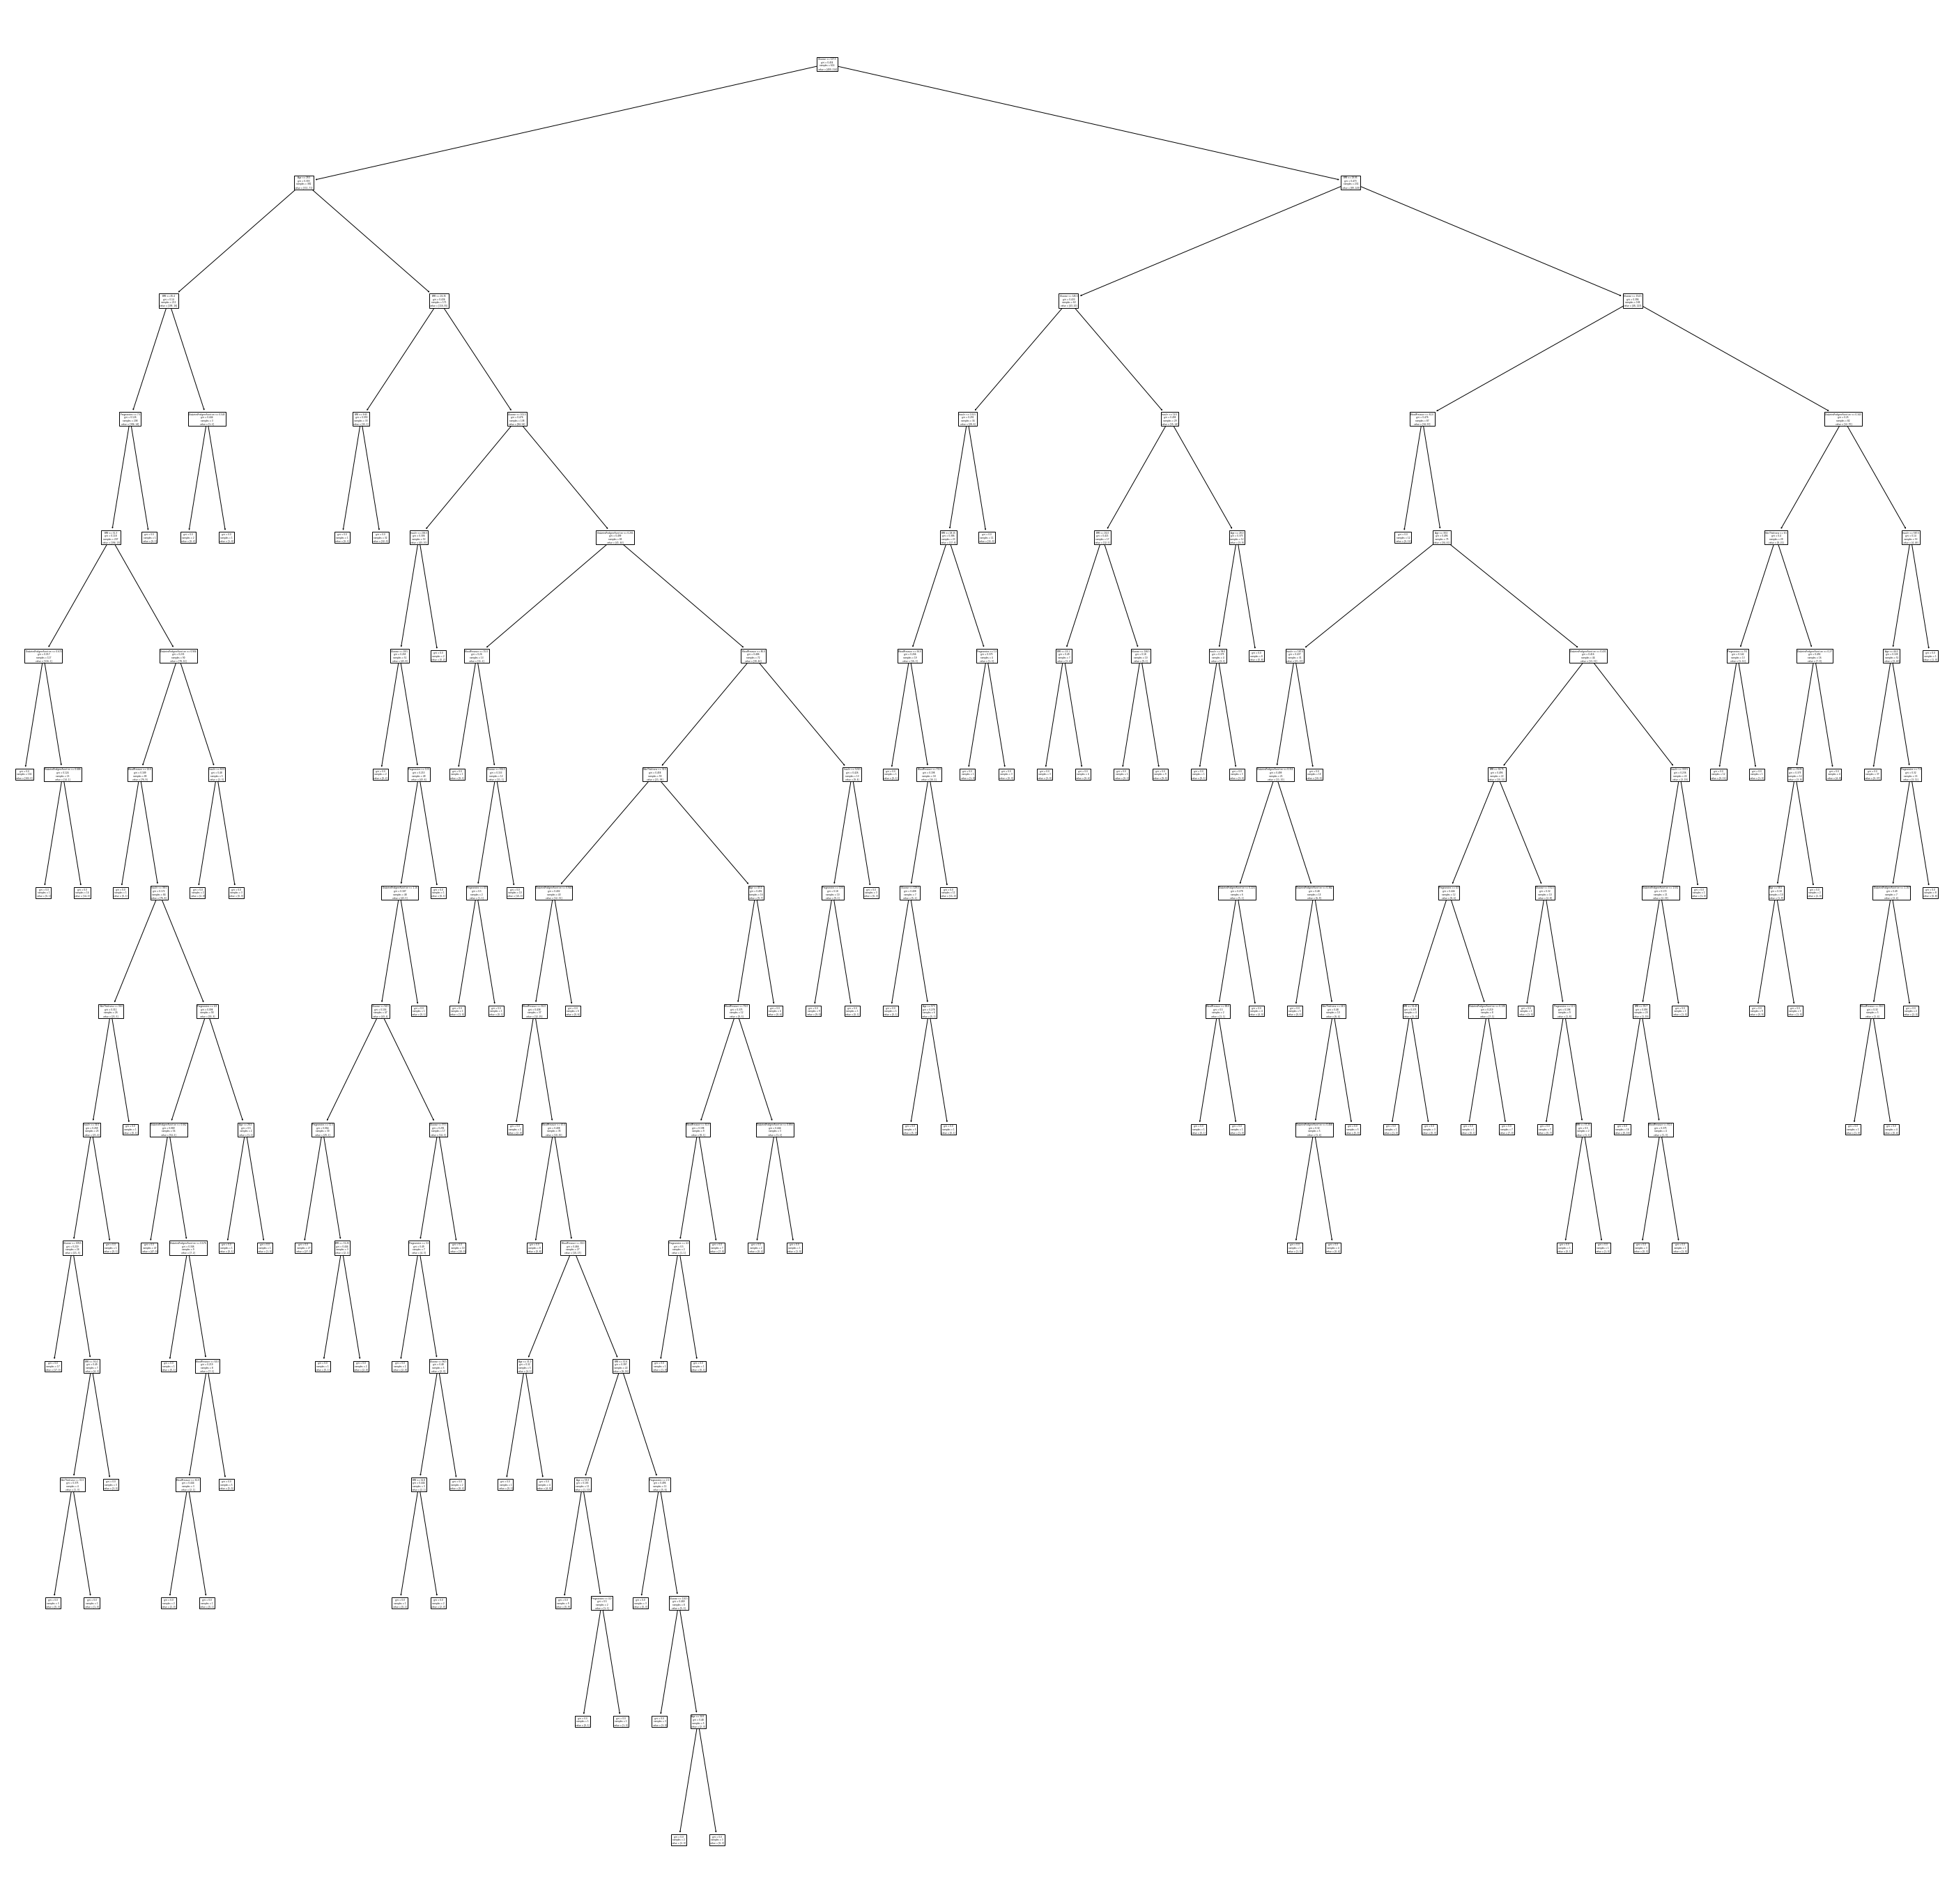

In [ ]:
figClass = plt.figure(figsize=(50,50))
_ = tree.plot_tree(dt, feature_names=feature_names)

In [ ]:
from sklearn.metrics import accuracy_score
result = model.predict(x_test)
print(result)

[0. 0. 0. 0. 1. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 1. 1. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 1. 1. 0. 0. 0. 1. 0. 0. 1. 0. 0. 0.
 0. 1. 0. 0. 1. 0. 1. 0. 0. 0. 1. 1. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 1. 0.
 1. 0. 1. 0. 1. 0. 1. 0. 1. 1. 1. 0. 1. 1. 0. 0. 1. 1. 0. 0. 1. 0. 0. 1.
 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 1. 0. 0. 1. 0. 1. 0. 1. 1. 1. 0. 0. 1. 1.
 1. 0. 0. 0. 0. 0. 0. 0. 1. 1. 1. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0.
 0. 1. 0. 1. 1. 0. 1. 0. 1. 0.]


In [ ]:
print(classification_report(y_test, result))
print("Accuracy score: ", accuracy_score(y_test, result))

              precision    recall  f1-score   support

         0.0       0.79      0.83      0.81       100
         1.0       0.65      0.59      0.62        54

    accuracy                           0.75       154
   macro avg       0.72      0.71      0.72       154
weighted avg       0.74      0.75      0.74       154

Accuracy score:  0.7467532467532467


In [ ]:
#Naive Bayes
from sklearn.naive_bayes import GaussianNB

g_nb = GaussianNB()
gnb = g_nb.fit(x_train, y_train) 
y_pred = gnb.predict(x_test)

print(classification_report(y_test, y_pred))
print("Accuracy score: ", accuracy_score(y_test, y_pred))

              precision    recall  f1-score   support

         0.0       0.75      0.82      0.78       100
         1.0       0.60      0.50      0.55        54

    accuracy                           0.71       154
   macro avg       0.68      0.66      0.67       154
weighted avg       0.70      0.71      0.70       154

Accuracy score:  0.7077922077922078


In [ ]:
#Linear Discriminant
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

clf = LinearDiscriminantAnalysis()
clf = clf.fit(x_train, y_train)
y_pred = clf.predict(x_test) 

print(classification_report(y_test, y_pred)) 
print("Accuracy score: ", accuracy_score(y_test, y_pred))

              precision    recall  f1-score   support

         0.0       0.77      0.91      0.83       100
         1.0       0.75      0.50      0.60        54

    accuracy                           0.77       154
   macro avg       0.76      0.71      0.72       154
weighted avg       0.76      0.77      0.75       154

Accuracy score:  0.7662337662337663


In [ ]:
#Logistic Regression
from sklearn.linear_model import LogisticRegression

lgTrain = LogisticRegression()
lgModel = lgTrain.fit(x_train, y_train)
y_pred = lgModel.predict(x_test)  

print(classification_report(y_test, y_pred))
print("Accuracy score: ", accuracy_score(y_test, y_pred))

              precision    recall  f1-score   support

         0.0       0.79      0.92      0.85       100
         1.0       0.78      0.54      0.64        54

    accuracy                           0.79       154
   macro avg       0.79      0.73      0.74       154
weighted avg       0.79      0.79      0.77       154

Accuracy score:  0.7857142857142857


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


In [ ]:
#Ensemble (Adaboost Classifier, 100 weak learners)
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import AdaBoostClassifier

clf = AdaBoostClassifier(n_estimators=100)
clf = clf.fit(x_train, y_train)
y_pred = clf.predict(x_test) #predictive model

print(classification_report(y_test, y_pred))
print("Accuracy score: ", accuracy_score(y_test, y_pred))

              precision    recall  f1-score   support

         0.0       0.81      0.81      0.81       100
         1.0       0.65      0.65      0.65        54

    accuracy                           0.75       154
   macro avg       0.73      0.73      0.73       154
weighted avg       0.75      0.75      0.75       154

Accuracy score:  0.7532467532467533


In [ ]:
#Neural Network/Perceptron
from sklearn.neural_network import MLPClassifier

#Hidden layers = how many neurons and layers
clf = MLPClassifier(alpha=1e-1, hidden_layer_sizes=(50, 2), 
                    random_state=1, 
                    max_iter=300).fit(x_train, y_train)
y_pred = clf.predict(x_test)

print(classification_report(y_test, y_pred))

print("Accuracy score: ", accuracy_score(y_test, y_pred))

              precision    recall  f1-score   support

         0.0       0.65      0.95      0.77       100
         1.0       0.38      0.06      0.10        54

    accuracy                           0.64       154
   macro avg       0.51      0.50      0.43       154
weighted avg       0.55      0.64      0.54       154

Accuracy score:  0.6363636363636364
